# Project: Wrangling and Analyze Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import os
import re
import json

In [3]:
%pip install tweepy
import tweepy


  Using cached oauthlib-3.2.2-py3-none-any.whl.metadata (7.5 kB)
   ---------------------------------------- 0.0/98.5 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/98.5 kB ? eta -:--:--
   ------------ --------------------------- 30.7/98.5 kB 435.7 kB/s eta 0:00:01
   ------------------------ --------------- 61.4/98.5 kB 469.7 kB/s eta 0:00:01
   ---------------------------------------- 98.5/98.5 kB 565.9 kB/s eta 0:00:00
Using cached oauthlib-3.2.2-py3-none-any.whl (151 kB)


## Data Gathering


In [4]:
twitter_archive=pd.read_csv("twitter-archive-enhanced.csv")
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [5]:
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
requests.get(url)

<Response [200]>

In [4]:
with open(url.split('/')[-1], mode='wb') as img_pre:
    img_pre.write(requests.get(url).content)

In [7]:
image_pred=pd.read_csv('image-predictions.tsv', delimiter='\t')
image_pred.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
455,674767892831932416,https://pbs.twimg.com/media/CV1B0WkWwAEBKVx.jpg,1,shower_curtain,0.238855,False,sarong,0.092414,False,kimono,0.056412,False
1781,828708714936930305,https://pbs.twimg.com/media/C4AqLSgVYAEg8nt.jpg,1,hippopotamus,0.942911,False,Mexican_hairless,0.008388,True,ice_lolly,0.006206,False
1131,728046963732717569,https://pbs.twimg.com/media/ChqK2cVWMAAE5Zj.jpg,1,Newfoundland,0.255971,True,groenendael,0.175583,True,German_shepherd,0.164135,True
1541,791026214425268224,https://pbs.twimg.com/media/CpmyNumW8AAAJGj.jpg,1,malamute,0.375098,True,jean,0.069362,False,keeshond,0.050528,True
1300,752660715232722944,https://pbs.twimg.com/media/CnH87L6XYAAF7I_.jpg,2,goose,0.339324,False,English_setter,0.050512,True,basset,0.049093,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [8]:
twitter_json_url='https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt'
requests.get(twitter_json_url)
with open(twitter_json_url.split('/')[-1], mode='wb') as t_json:
    t_json.write(requests.get(twitter_json_url).content)

In [9]:
data = []
with open('tweet-json.txt', mode='r') as f:
    for line in f:
        try:
            obj = json.loads(line)
            data.append(obj)
        except json.JSONDecodeError as e:
            print(f"Error decoding JSON on line {line}: {e}")


In [ ]:
# Use Twitter API to collect status data on tweets 
tweet_ids = list(twitter1['tweet_id'])

tweet_data = []
tweet_id_success = []
tweet_id_missing = []
for tweet_id in tweet_ids:
    try:
        data = api.get_status(tweet_id, 
                              tweet_mode='extended',
                              wait_on_rate_limit = True,
                              wait_on_rate_limit_notify = True)
        tweet_data.append(data)
        tweet_id_success.append(tweet_id)
    except:
        tweet_id_missing.append(tweet_id)
        print(tweet_id)

In [ ]:
# Setting up the Twitter API with authentication pieces
consumer_key = '...'
consumer_secret = '...'
access_token = '...'
access_secret = '...'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [10]:
df_json = pd.read_json('tweet-json.txt', lines =True)
df_json.head()
#df_json.info()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [11]:
df_json=df_json[['id', 'retweet_count', 'favorite_count']]
df_json.sample(5)


,id,retweet_count,favorite_count
89,874680097055178752,4875,28439
1177,719367763014393856,827,3022
1650,683481228088049664,1118,2878
1826,676263575653122048,609,2243
1151,725729321944506368,2009,5646


## Assessing Data

In [12]:
twitter_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2089,670789397210615808,NaN,NaN,2015-11-29 02:20:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Two obedient dogs here. Left one has extra leg...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670789397...,9,10,NaN,NaN,NaN,NaN,NaN
338,832369877331693569,NaN,NaN,2017-02-16 23:23:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Charlie. He fell asleep on a heating v...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/832369877...,11,10,Charlie,NaN,NaN,NaN,NaN
472,816450570814898180,NaN,NaN,2017-01-04 01:05:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Moose. He doesn't want his friend to go b...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/816450570...,13,10,Moose,NaN,NaN,NaN,NaN
1691,681320187870711809,NaN,NaN,2015-12-28 03:46:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Glacier. He's a very happy pup. Loves ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681320187...,11,10,Glacier,NaN,NaN,NaN,NaN
1162,723688335806480385,NaN,NaN,2016-04-23 01:41:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Reginald. He starts screaming at rando...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/723688335...,12,10,Reginald,NaN,NaN,NaN,NaN
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,11,10,NaN,doggo,NaN,pupper,NaN
92,874296783580663808,NaN,NaN,2017-06-12 16:06:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jed. He may be the fanciest pupper in ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/874296783...,13,10,Jed,NaN,NaN,pupper,NaN
238,847116187444137987,NaN,NaN,2017-03-29 16:00:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Unbelievable... We. Only. Rate. Dogs. Please s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/847116187...,11,10,NaN,NaN,NaN,NaN,NaN
2185,668986018524233728,NaN,NaN,2015-11-24 02:54:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ruby. She's a Bimmington Fettuccini. O...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668986018...,9,10,Ruby,NaN,NaN,NaN,NaN
1238,712097430750289920,NaN,NaN,2016-03-22 02:03:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I can't even comprehend how confused this dog ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/712097430...,10,10,NaN,NaN,NaN,NaN,NaN


In [13]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1611 non-null   object 
 13  doggo                       97 no

timestamp should have datatype time.


In [14]:
sum(twitter_archive.duplicated())

0

In [16]:
twitter_archive.isnull().sum()

#expand urls has 59 null values
# in_reply_to_status_id, in_reply_to_user_id, 
# retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp columns has null values

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                           745
doggo                         2259
floofer                       2346
pupper                        2099
puppo                         2326
dtype: int64

In [17]:
twitter_archive['text'].duplicated().sum()

0

In [18]:
twitter_archive['expanded_urls'].duplicated().sum()

137

In [19]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [20]:
len(twitter_archive[twitter_archive['doggo'] == 'None']),len(twitter_archive[twitter_archive['floofer'] == 'None']),len(twitter_archive[twitter_archive['pupper'] == 'None']),len(twitter_archive[twitter_archive['puppo'] == 'None'])

(0, 0, 0, 0)

In [22]:
len(twitter_archive[twitter_archive['name']=="None"]) #name shouldnt have the "None"

0

In [21]:
twitter_archive['rating_denominator'].value_counts()

rating_denominator
10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: count, dtype: int64

In [23]:
twitter_archive['name'].value_counts()

## None, a , an, the (inapproriate names for dogs)

name
a             55
Charlie       12
Oliver        11
Cooper        11
Lucy          11
              ..
Aqua           1
Chase          1
Meatball       1
Rorie          1
Christoper     1
Name: count, Length: 956, dtype: int64

In [24]:
sum(twitter_archive.duplicated())

0

In [25]:
image_pred.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
626,680801747103793152,https://pbs.twimg.com/media/CXKxkseW8AAjAMY.jpg,1,pug,0.996720,True,Labrador_retriever,0.001439,True,Staffordshire_bullterrier,0.000518,True
1478,780601303617732608,https://pbs.twimg.com/media/CtVAvX-WIAAcGTf.jpg,1,Saint_Bernard,0.995143,True,Cardigan,0.003044,True,English_springer,0.001050,True
1866,843604394117681152,https://pbs.twimg.com/media/C7UVuE_U0AI8GGl.jpg,1,Labrador_retriever,0.430583,True,golden_retriever,0.263581,True,Great_Pyrenees,0.179385,True
75,667405339315146752,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg,1,Saint_Bernard,0.381377,True,Leonberg,0.127998,True,golden_retriever,0.069357,True
318,671763349865160704,https://pbs.twimg.com/media/CVKVM3NW4AAdi1e.jpg,1,prayer_rug,0.445334,False,doormat,0.275311,False,bib,0.048813,False
1818,834167344700198914,https://pbs.twimg.com/media/C5OOxY6WAAAxERz.jpg,1,ox,0.991682,False,bison,0.005335,False,water_buffalo,0.001130,False
532,676864501615042560,https://pbs.twimg.com/media/CWS0q8iU8AE2Srr.jpg,1,Chesapeake_Bay_retriever,0.371146,True,water_buffalo,0.099596,False,Weimaraner,0.048968,True
153,668655139528511488,https://pbs.twimg.com/media/CUeKTeYW4AEr_lx.jpg,1,beagle,0.319110,True,Italian_greyhound,0.103338,True,basenji,0.091930,True
808,692142790915014657,https://pbs.twimg.com/media/CZr8LvyXEAABJ9k.jpg,3,toy_poodle,0.670068,True,teddy,0.190898,False,miniature_poodle,0.032178,True
763,688908934925697024,https://pbs.twimg.com/media/CY9_BOYWkAAkuzn.jpg,1,crane,0.158859,False,pier,0.130016,False,bell_cote,0.087741,False


In [26]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [27]:
image_pred.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [28]:
image_pred.duplicated().sum()

0

In [29]:
image_pred['p3'].duplicated().sum()

#names of p1,p2,p3 has some in approriate predections names of dog. (tennis-ball, green_lizard, water_buffalo, beagle)

1667

In [30]:
image_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [31]:
image_pred['jpg_url'].duplicated().sum()

66

In [32]:
image_pred['img_num'].duplicated().sum()

2071

In [33]:
df_json.sample(20)

,id,retweet_count,favorite_count
219,850019790995546112,5459,21944
147,863427515083354112,105,2363
1100,735274964362878976,4707,9629
1888,674767892831932416,883,1981
631,793962221541933056,5711,18910
1002,747816857231626240,1316,5346
2069,671115716440031232,842,1436
162,860276583193509888,3745,19154
1465,694329668942569472,569,2203
545,805823200554876929,9374,0


In [34]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [35]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1611 non-null   object 
 13  doggo                       97 no

In [36]:
df_json.isnull().sum()

id                0
retweet_count     0
favorite_count    0
dtype: int64

In [37]:
df_json['retweet_count'].duplicated().sum()

630

In [38]:
df_json['favorite_count'].duplicated().sum()

347

In [39]:
df_json['retweet_count'].value_counts()

retweet_count
1972    5
3652    5
83      5
1207    4
336     4
       ..
3357    1
3018    1
2181    1
848     1
147     1
Name: count, Length: 1724, dtype: int64

In [40]:
df_json['favorite_count'].value_counts()

favorite_count
0       179
2706      3
2918      3
610       3
2768      3
       ... 
7493      1
6671      1
4484      1
2872      1
2535      1
Name: count, Length: 2007, dtype: int64

In [41]:
df_json.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


### Quality issues
1.the timestamp of twitter_archive data


2.null values in 5 columns of twitter_archive data

3.Name colum has inappropriate names 

4.rating_numerator and rating_denominator has some values lower than 10 in numerator and denominator of 10.

5.expand_url has null values and some duplicates

6.P1,p2,p3 columns has inappropriate predict names and lower case characters that can be removed.

7.some duplicates in the img_numbs & jpg_urls 

8.retweet_count & favourite_counts has duplicates and favourites_count has 0 in it.

### Tidiness issues
1. doggo,pluffer, floofer,puppy can be in one predictions, and p1,p2,p3 are also the same.

2. using tweet id as common row can combine the all the tables

## Cleaning Data


Made a copy of the original data before cleaning.

In [42]:
# Make copies of original pieces of data
ta_clean=twitter_archive.copy()
imgepred_clean=image_pred.copy()
dfjson_clean=df_json.copy()
ta_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,NaN,NaN,NaN,NaN
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,NaN,NaN,NaN,NaN
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,NaN,NaN,NaN,NaN
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,NaN,NaN,NaN,NaN


In [44]:
#change the datatype of timestamp to time
ta_clean['timestamp']=pd.to_datetime(ta_clean['timestamp'])

In [41]:
ta_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1

In [45]:
#removing the major unnecessary null values columns
ta_clean.drop(['in_reply_to_status_id','in_reply_to_user_id'],axis=1,inplace=True)

In [46]:
ta_clean = ta_clean[ta_clean.retweeted_status_id.isnull()]
ta_clean = ta_clean[ta_clean.retweeted_status_user_id.isnull()]
ta_clean = ta_clean[ta_clean.retweeted_status_timestamp.isnull()]

In [47]:

(ta_clean).info()

<class 'pandas.core.frame.DataFrame'>
Index: 2175 entries, 0 to 2355
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2175 non-null   int64              
 1   timestamp                   2175 non-null   datetime64[ns, UTC]
 2   source                      2175 non-null   object             
 3   text                        2175 non-null   object             
 4   retweeted_status_id         0 non-null      float64            
 5   retweeted_status_user_id    0 non-null      float64            
 6   retweeted_status_timestamp  0 non-null      object             
 7   expanded_urls               2117 non-null   object             
 8   rating_numerator            2175 non-null   int64              
 9   rating_denominator          2175 non-null   int64              
 10  name                        1495 non-null   object             
 

In [48]:
#Name columns has inapproriate names 
ta_clean['name'].replace(['None', 'a','an','the','my','such','getting','just'], 'NaN', inplace=True)

In [49]:
ta_clean['name'].value_counts()

name
NaN           76
Charlie       11
Lucy          11
Cooper        10
Oliver        10
              ..
Rose           1
Theo           1
Fido           1
Emma           1
Christoper     1
Name: count, Length: 949, dtype: int64

In [50]:
ta_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2175 entries, 0 to 2355
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2175 non-null   int64              
 1   timestamp                   2175 non-null   datetime64[ns, UTC]
 2   source                      2175 non-null   object             
 3   text                        2175 non-null   object             
 4   retweeted_status_id         0 non-null      float64            
 5   retweeted_status_user_id    0 non-null      float64            
 6   retweeted_status_timestamp  0 non-null      object             
 7   expanded_urls               2117 non-null   object             
 8   rating_numerator            2175 non-null   int64              
 9   rating_denominator          2175 non-null   int64              
 10  name                        1495 non-null   object             
 

In [51]:
#rating_numerator and denominator cleaning of values lower than 10.
ta_clean['rating_denominator']=10

In [52]:
ta_clean['rating_denominator'].value_counts()

rating_denominator
10    2175
Name: count, dtype: int64

In [53]:
#cleaning the expand_url null values and some duplicates
ta_clean['expanded_urls'].dropna(inplace=True)

In [54]:
ta_clean['expanded_urls'].isnull().sum()

58

In [55]:
#p1,p2,p3 columns has inapproriate predict and lowercase change
imgepred_clean['p1'] = imgepred_clean['p1'].str.lower()
imgepred_clean['p2'] = imgepred_clean['p2'].str.lower()
imgepred_clean['p3'] = imgepred_clean['p3'].str.lower()

In [56]:
imgepred_clean['p1'].sample(5)

1011                    maltese_dog
129                golden_retriever
1575               golden_retriever
355                  great_pyrenees
1063    west_highland_white_terrier
Name: p1, dtype: object

In [57]:
#dropping duplicates in the img_numbs & jpg_urls 
imgepred_clean=imgepred_clean.drop_duplicates(subset='jpg_url',keep='first')

In [58]:
imgepred_clean[imgepred_clean['jpg_url'].notnull()].sum()

tweet_id                                  3556607206382384381
jpg_url     https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jp...
img_num                                                  2416
p1          welsh_springer_spanielredbonegerman_shepherdrh...
p1_conf                                            1194.28381
p1_dog                                                   1480
p2          collieminiature_pinschermalinoisredbonerottwei...
p2_conf                                            269.352062
p2_dog                                                   1500
p3          shetland_sheepdogrhodesian_ridgebackbloodhound...
p3_conf                                            120.882765
p3_dog                                                   1450
dtype: object

In [59]:
imgepred_clean.sample(6)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
935,703407252292673536,https://pbs.twimg.com/media/CcMBJODUsAI5-A9.jpg,1,doormat,0.201058,False,turnstile,0.088583,False,carton,0.082924,False
1869,844580511645339650,https://pbs.twimg.com/media/C7iNfq1W0AAcbsR.jpg,1,washer,0.903064,False,dishwasher,0.032489,False,printer,0.016456,False
1811,832998151111966721,https://pbs.twimg.com/media/C49nZavUYAEJjGw.jpg,1,boxer,0.539036,True,french_bulldog,0.317617,True,bull_mastiff,0.093928,True
1470,779123168116150273,https://pbs.twimg.com/media/CtAAYizW8AAWzBZ.jpg,1,toy_poodle,0.431080,True,soft-coated_wheaten_terrier,0.060365,True,cocker_spaniel,0.059845,True
209,669972011175813120,https://pbs.twimg.com/media/CUw3_QiUEAA8cT9.jpg,1,teddy,0.953071,False,koala,0.007027,False,fur_coat,0.005368,False
809,692158366030913536,https://pbs.twimg.com/media/CZsKVxfWQAAXy2u.jpg,1,pug,0.956565,True,swing,0.018907,False,toy_poodle,0.013544,True


In [60]:
imgepred_clean['jpg_url'].duplicated().sum()

0

In [61]:
#from the p1_dog,p2_dog,p3_dog eliminating the False to filter the dog only category
imgepred_clean = imgepred_clean.loc[imgepred_clean['p1_dog'] != False]

In [62]:
imgepred_clean = imgepred_clean.loc[imgepred_clean['p2_dog'] != False]

In [63]:
imgepred_clean = imgepred_clean.loc[imgepred_clean['p3_dog'] != False]

In [64]:
imgepred_clean.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
527,676617503762681856,https://pbs.twimg.com/media/CWPUB9TWwAALPPx.jpg,1,chihuahua,0.841084,True,pomeranian,0.120530,True,pekinese,0.006600,True
1720,819347104292290561,https://pbs.twimg.com/media/C17n1nrWQAIErU3.jpg,3,rottweiler,0.909106,True,black-and-tan_coonhound,0.044120,True,doberman,0.031835,True
983,707411934438625280,https://pbs.twimg.com/media/CdE7ZktXIAEiWLj.jpg,1,lakeland_terrier,0.738277,True,airedale,0.028515,True,giant_schnauzer,0.024876,True
699,684594889858887680,https://pbs.twimg.com/media/CYAra7JWsAACPZH.jpg,1,weimaraner,0.948688,True,english_setter,0.035352,True,brittany_spaniel,0.003879,True
486,675497103322386432,https://pbs.twimg.com/media/CV_ZAhcUkAUeKtZ.jpg,1,vizsla,0.519589,True,miniature_pinscher,0.064771,True,rhodesian_ridgeback,0.061491,True


In [65]:
#emoving favorite_count 0 in it, by joining archive and json data
dfjson_clean.sample(5)

,id,retweet_count,favorite_count
632,793845145112371200,2187,10295
465,817171292965273600,2326,9690
2352,666029285002620928,48,132
1365,702598099714314240,3712,11332
1257,710272297844797440,1425,4945


In [66]:
dfjson_clean.rename(columns={'id':'tweet_id'},inplace=True)

In [67]:
dfjson_clean.sample(3)

,tweet_id,retweet_count,favorite_count
1636,684188786104872960,1343,3831
1556,688789766343622656,759,2434
185,856288084350160898,17,545


In [68]:
dfjson_clean = dfjson_clean[dfjson_clean['favorite_count'] != 0]

In [69]:
dfjson_clean['favorite_count'].value_counts()

favorite_count
2918    3
1691    3
610     3
2768    3
1339    3
       ..
7493    1
6671    1
4484    1
2872    1
2535    1
Name: count, Length: 2006, dtype: int64

In [70]:
#reframing the 4 columns(doggo, pupper..) into one column
ta_clean['dog_s'] = 'None'

def dog(row):
    dog_s = []
    if row['doggo'] == 'doggo':
        dog_s.append('doggo')
    if row['floofer'] == 'floofer':
        dog_s.append('floofer')
    if row['pupper'] == 'pupper':
        dog_s.append('pupper')
    if row['puppo'] == 'puppo':
        dog_s.append('puppo')
    
    if len(dog_s) < 1:
        row['dog_s'] = np.nan
    else:
        row['dog_s'] = ','.join(dog_s)
        
    return row

ta_clean = ta_clean.apply(dog, axis=1)

In [71]:
ta_clean['dog_s'].value_counts()

dog_s
pupper           224
doggo             75
puppo             24
doggo,pupper      10
floofer            9
doggo,puppo        1
doggo,floofer      1
Name: count, dtype: int64

In [72]:
ta_clean['dog_s'].value_counts()

dog_s
pupper           224
doggo             75
puppo             24
doggo,pupper      10
floofer            9
doggo,puppo        1
doggo,floofer      1
Name: count, dtype: int64

In [73]:
ta_clean.drop(['doggo','pupper','puppo','floofer'],axis=1,inplace=True)

In [74]:
#merging the ta_clean& json_clean
ta_json_merge=pd.merge(ta_clean,dfjson_clean,how='left',on='tweet_id')

In [75]:
ta_json_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2175 non-null   int64              
 1   timestamp                   2175 non-null   datetime64[ns, UTC]
 2   source                      2175 non-null   object             
 3   text                        2175 non-null   object             
 4   retweeted_status_id         0 non-null      float64            
 5   retweeted_status_user_id    0 non-null      float64            
 6   retweeted_status_timestamp  0 non-null      float64            
 7   expanded_urls               2117 non-null   object             
 8   rating_numerator            2175 non-null   int64              
 9   rating_denominator          2175 non-null   int64              
 10  name                        1495 non-null   object          

In [77]:
ta_json_merge.sample(3)

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_s,retweet_count,favorite_count
1692,675147105808306176,2015-12-11 02:56:28+00:00,"<a href=""http://twitter.com/download/iphone"" r...",When you're presenting a group project and the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675147105...,10,10,NaN,NaN,273,1026
115,867421006826221569,2017-05-24 16:44:18+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Shikha. She just watched you drop a sk...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/867421006...,12,10,Shikha,puppo,2697,16755
130,863427515083354112,2017-05-13 16:15:35+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,NaN,NaN,105,2363


In [78]:
#merging the prediciton data into one table
master=pd.merge(ta_json_merge,imgepred_clean,how='left',on='tweet_id')

In [79]:
master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2175 non-null   int64              
 1   timestamp                   2175 non-null   datetime64[ns, UTC]
 2   source                      2175 non-null   object             
 3   text                        2175 non-null   object             
 4   retweeted_status_id         0 non-null      float64            
 5   retweeted_status_user_id    0 non-null      float64            
 6   retweeted_status_timestamp  0 non-null      float64            
 7   expanded_urls               2117 non-null   object             
 8   rating_numerator            2175 non-null   int64              
 9   rating_denominator          2175 non-null   int64              
 10  name                        1495 non-null   object          

In [80]:
master.sample(3)

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1790,673317986296586240,2015-12-06 01:48:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Take a moment and appreciate how these two dog...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673317986...,10,10,...,2.0,miniature_pinscher,0.384099,True,bloodhound,0.079923,True,rottweiler,0.068594,True
439,808733504066486276,2016-12-13 18:01:07+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a pupper in a onesie. Quite pupset abou...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808733504...,12,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988,669359674819481600,2015-11-25 03:39:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Saydee. She's a Rochester Ecclesiastical...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669359674...,11,10,...,1.0,labrador_retriever,0.367818,True,german_short-haired_pointer,0.280642,True,chesapeake_bay_retriever,0.184246,True


## Storing Data
Saved gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [81]:
master.to_csv('twitter_archive_master.csv',index=False)

In [82]:
twitter_archive_master=pd.read_csv('twitter_archive_master.csv')
twitter_archive_master.head()

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,...,1.0,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,...,1.0,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,...,2.0,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True


In [83]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   timestamp                   2175 non-null   object 
 2   source                      2175 non-null   object 
 3   text                        2175 non-null   object 
 4   retweeted_status_id         0 non-null      float64
 5   retweeted_status_user_id    0 non-null      float64
 6   retweeted_status_timestamp  0 non-null      float64
 7   expanded_urls               2117 non-null   object 
 8   rating_numerator            2175 non-null   int64  
 9   rating_denominator          2175 non-null   int64  
 10  name                        1419 non-null   object 
 11  dog_s                       344 non-null    object 
 12  retweet_count               2175 non-null   int64  
 13  favorite_count              2175 

## Analyzing and Visualizing Data


In [84]:
x=(twitter_archive_master['rating_numerator']/twitter_archive_master['rating_denominator'])
x

0       1.3
1       1.3
2       1.2
3       1.3
4       1.2
       ... 
2170    0.5
2171    0.6
2172    0.9
2173    0.7
2174    0.8
Length: 2175, dtype: float64

In [85]:
x.value_counts()

1.2      500
1.0      442
1.1      426
1.3      307
0.9      156
0.8       98
0.7       54
1.4       43
0.5       36
0.6       32
0.3       19
0.4       17
0.2        9
0.1        8
42.0       2
0.0        2
1.7        1
4.5        1
6.0        1
14.3       1
4.4        1
9.9        1
12.1       1
2.0        1
2.6        1
14.4       1
8.0        1
16.5       1
5.0        1
20.4       1
177.6      1
2.7        1
7.5        1
2.4        1
8.4        1
96.0       1
1.5        1
18.2       1
66.6       1
8.8        1
Name: count, dtype: int64

In [86]:
x.max()

177.6

In [87]:
t_rate=twitter_archive_master['rating_numerator'].value_counts().sort_index()
t_rate

rating_numerator
0         2
1         8
2         9
3        19
4        17
5        36
6        32
7        54
8        98
9       156
10      442
11      426
12      500
13      307
14       43
15        1
17        1
20        1
24        1
26        1
27        1
44        1
45        1
50        1
60        1
75        1
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
182       1
204       1
420       2
666       1
960       1
1776      1
Name: count, dtype: int64

In [88]:
twitter_archive_master['retweet_count'].max()

79515

In [89]:
twitter_archive_master.loc[twitter_archive_master['retweet_count'] == 79515.0]

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
862,744234799360020481,2016-06-18 18:26:18+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/744234799...,13,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
t_source=twitter_archive_master['source'].value_counts()
t_source

source
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2042
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: count, dtype: int64

In [91]:
twitter_archive_master['timestamp']=pd.to_datetime(twitter_archive_master['timestamp'])
twitter_archive_master['year']=twitter_archive_master['timestamp'].dt.strftime('%Y')
t_year=twitter_archive_master['year'].value_counts().sort_index(ascending=True)
t_year

year
2015     688
2016    1088
2017     399
Name: count, dtype: int64

In [92]:
twitter_archive_master['timestamp']=pd.to_datetime(twitter_archive_master['timestamp'])
twitter_archive_master['year']=twitter_archive_master['timestamp'].dt.strftime('%Y-%m')
t_yearm=twitter_archive_master['year'].value_counts().sort_index(ascending=True)
t_yearm

year
2015-11    300
2015-12    388
2016-01    194
2016-02    125
2016-03    136
2016-04     60
2016-05     60
2016-06     94
2016-07     97
2016-08     63
2016-09     69
2016-10     73
2016-11     58
2016-12     59
2017-01     71
2017-02     72
2017-03     57
2017-04     49
2017-05     45
2017-06     50
2017-07     53
2017-08      2
Name: count, dtype: int64

In [93]:
t_name=twitter_archive_master['name'].value_counts()
t_name

name
Lucy          11
Charlie       11
Cooper        10
Oliver        10
Penny          9
              ..
Rose           1
Theo           1
Fido           1
Emma           1
Christoper     1
Name: count, Length: 948, dtype: int64

### Insights:
1. the most retweeted id  is 744234799360020481 which is sent from the iphone.

2. the most tweets are from the iphone has the 1068, in which most tweets are happended in the year 2016.

3. the most tweeted dog name was 'charlie'&'Lucy'.

### Visualization

Text(0, 0.5, 'tweet count')

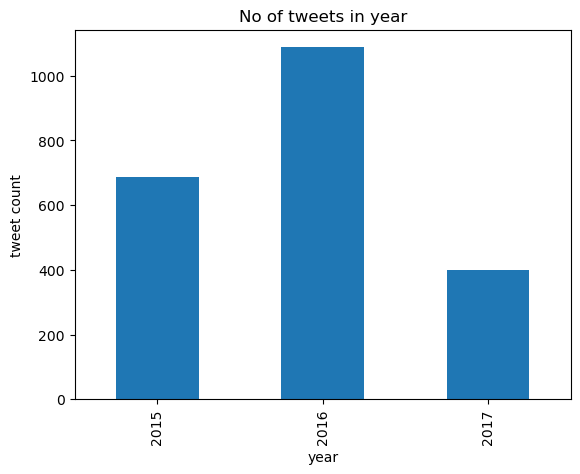

In [94]:
t_year.plot(kind='bar',title='No of tweets in year')
plt.xlabel('year')
plt.ylabel('tweet count')

Text(0, 0.5, 'tweet count')

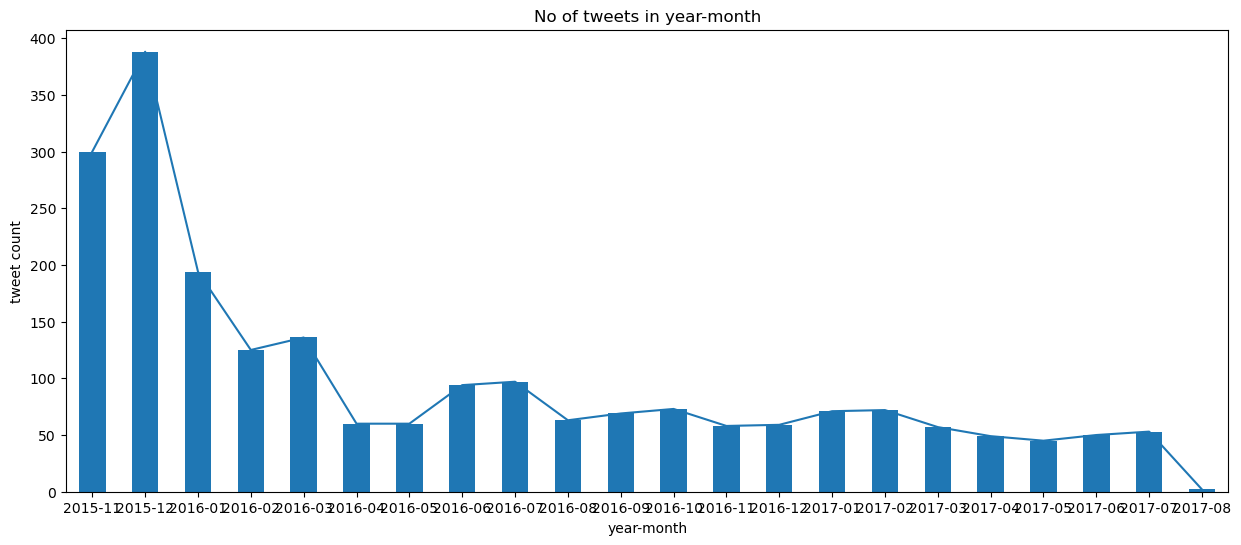

In [95]:
plt.figure(figsize=(15,6))
t_yearm.plot(kind='bar',title='No of tweets in year-month')
t_yearm.plot(kind='line')

plt.xlabel('year-month')
plt.ylabel('tweet count')

Text(0, 0.5, 'Dog names')

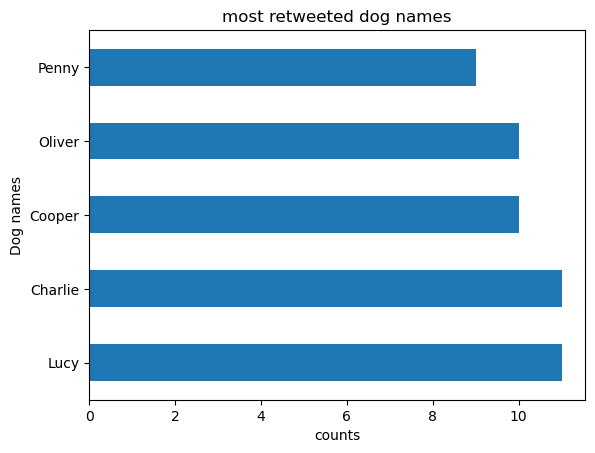

In [96]:
t_name[:5].plot(kind='barh', title='most retweeted dog names')
plt.xlabel('counts')
plt.ylabel('Dog names')

Text(0, 0.5, ' count')

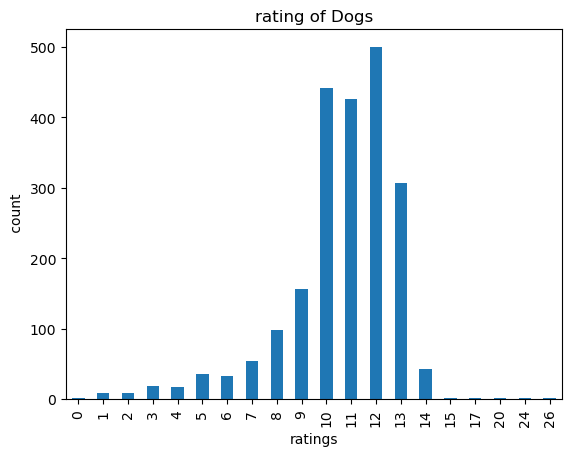

In [97]:
t_rate[0:20].plot(kind='bar',title="rating of Dogs")
plt.xlabel('ratings')
plt.xticks()
plt.ylabel(' count')

Text(0, 0.5, 'tweet source')

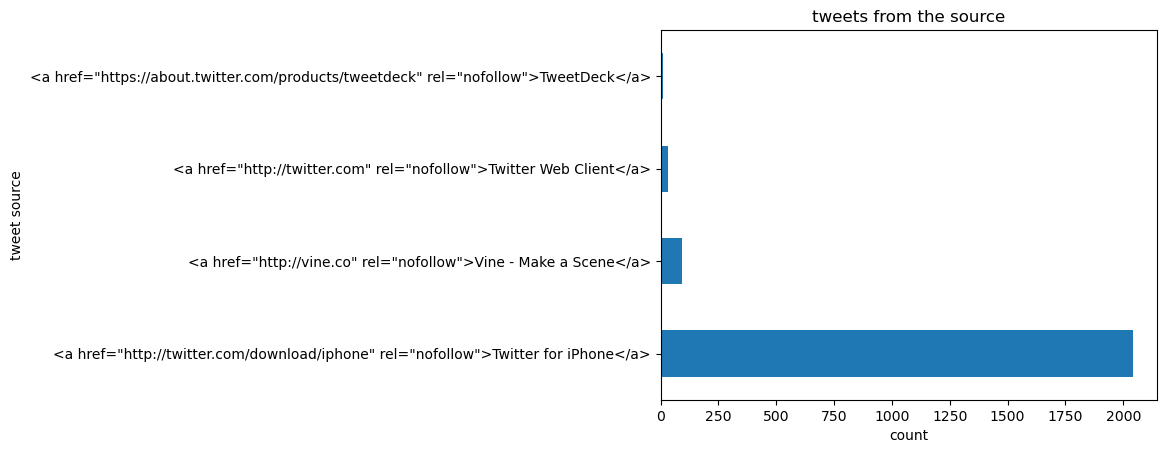

In [98]:
t_source.plot(kind='barh')
plt.xlabel('count')
plt.title('tweets from the source')
plt.ylabel('tweet source')

## Final Conclusion




To initiate the data wrangling process, I collected data from three different sources using distinct methods. The first method was straightforward: I obtained a CSV file from the Udacity website and imported it into a dataframe named "twitter_archive." For the second data source, I programmatically downloaded a TSV file from a URL provided by Udacity using the `requests` library, and then read it into a dataframe named "image_pred.” Lastly, since could obtain access to the Twitter developer API, I used a TXT file provided by Udacity containing JSON data with additional data from the API extract. I read this file line by line using the `read_json` library to create a dataframe called "df_json.”

For the assessment process, I used two types of evaluations: visual and programmatic. In the "twitter_archive" dataframe, I identified issues with the extraction of names, ratings, and dog stages from the text column. Additionally, several columns in both the "twitter_archive" and "image_pred" dataframes contained multiple variables. Regarding the "df_json" dataframe, I identified the need to narrow down the columns required for analysis. I detailed the quality and tidiness issues to be addressed during the cleaning process.

After creating duplicates of each dataframe, I started the cleaning process by defining the issues, coding the solutions, and testing the results. I began with the quality issues and then addressed the structural problems of the dataframes. This involved creating a new column "dog_s" and eliminating non-dog entries in the "twitter_archive" and "image_pred" dataframes. After cleaning, I merged all three dataframes into a single dataframe for better analysis. This merged dataframe was saved as a new CSV file called "twitter_archive_master.csv." Finally, I analyzed the data for insights and visualized the results.